In [0]:
import operator
import random

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [0]:
#Reading file and splitting training and testing data
x = []
y = []
#Reading file
with open("hw1data.txt", 'r') as fp:
    lines = fp.readlines()
    for line in lines:
        x1, y1 = line.strip().split(" ")
        x.append(float(x1))
        y.append(float(y1))
x = np.array(x)
x = x[:, np.newaxis]
y = np.array(y)
y = y[:, np.newaxis]

#Splitting
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size=0.25, shuffle=False)

In [0]:
def best_estimator(x, y):
  degs = [0]*100
  all_mse = [0]*100
  for i in range(0,100):
    degs[i] = (i*2 + 1)
  for i in range(0,100):
        poly_features = PolynomialFeatures(degree=degs[i])
        x_poly = poly_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        ytrain_poly_pred = model.predict(x_poly)
        
        rmse_train = mean_squared_error(y, ytrain_poly_pred)
        all_mse[i] = rmse_train

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, ytrain_poly_pred), key=sort_axis)
        x, ytrain_poly_pred = zip(*sorted_zip)
  
  top_three = []
  for i in range(0,100):
    print(degs[i], ": ", all_mse[i])
    
  best_three_estimator(x, y, degs)
    

In [0]:
def best_three_estimator(x, y, degs):
  plt.figure(2)
  plt.title('Polynomial Estimators on the Training Data (Degrees 195, 197,199) ')
  plt.scatter(x, y, s=10)
  colours = ['b', 'g', 'c']
  ct=0
  sum = [0]*len(x)
  avg = [0]*len(x)
  for i in range(97,100):
        print(degs[i])
        poly_features = PolynomialFeatures(degree=degs[i])
        x_poly = poly_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        
        for j in range(0, len(y_poly_pred)):
          sum[j] += y_poly_pred[j]

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        col = colours[ct]
        ct+=1
        plt.plot(x, y_poly_pred, color=col)
        plt.gca().legend(('Deg. 195', 'Deg. 197', 'Deg. 199'))
  
  plt.show()
  plt.figure(2)
  plt.title('Avg of 3 best estimators (Degrees 195, 197,199) by training error')
  plt.scatter(x, y, s=10)
  for n in range(0, len(sum)):
      avg[n] = sum[n]/3
      
      plt.plot(x, avg)

In [0]:
def bias_var(degree):
  B2 = []
  Var = []
  for deg in degree:
        all_preds = np.zeros((100, 51))
        for i in range(0, 100):
          x2 = []
          y2 = []
          
          #Reading file
          with open("hw1data.txt", 'r') as fp:
              lines = fp.readlines()
              #random.shuffle(lines)
              for line in lines:
                  x1, y1 = line.strip().split(" ")
                  x2.append(float(x1))
                  y2.append(float(y1))

          x2 = np.array(x2)
          x2 = x2[:, np.newaxis]
          y2 = np.array(y2)
          y2 = y2[:, np.newaxis]

          x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x2,y2,test_size=0.25, shuffle=True)
          
          poly_features2 = PolynomialFeatures(degree=deg)
        
          x_poly2 = poly_features2.fit_transform(x_training_data)
          xtest_poly2 = poly_features2.transform(x_test_data)
          model = LinearRegression()
          model.fit(x_poly2, y_training_data)
          ytest_poly_pred2 = model.predict(xtest_poly2)
          ix = np.isin(x2, x_test_data)
          locs = np.where(ix==True)
          ytest_poly_pred2 = np.array(ytest_poly_pred2)
          ytest_poly_pred2 = np.reshape(ytest_poly_pred2,(1,13))
          ytest_poly_pred2 = ytest_poly_pred2.ravel()
          #print(ytest_poly_pred2)
          #print("len", len(locs[0]), len(x_test_data))
          for j in range(13):
              all_preds[i][locs[0][j]] = ytest_poly_pred2[j]
      
        sum_all = [0]*51
        non_zero = []
        non_zero = np.count_nonzero(all_preds, axis=0)
        #print("non-zero", non_zero)
        for p in range(0, len(x2)):
          for k in range(0, 100):
            sum_all[p] += all_preds[k][p]
        #print("sum_all",sum_all)
        exp_est = [0]*51
        for l in range(0, len(x2)):
          exp_est[l] += sum_all[l]/non_zero[l]
        #print("------------------")
        #print(exp_est)
        #print("------------------")
        
        B2.append(np.mean((y2 - exp_est)**2))
        
        var = [0]*len(x2)
        variance = [0]*len(x2)
        
        for p in range(0, 100):
          for k in range(0, len(x2)):
            if(all_preds[p][k] != 0):
                         var[k] += (all_preds[p][k] - exp_est[k])
        for c in range(0, len(x2)):
          variance[c] = (var[c]/non_zero[c])**2
        Var.append(np.mean(variance))
  print("---------------------------------------------------------------------")
  print("Squared Bias:", B2)
  print("---------------------------------------------------------------------")
  print("Variance:", Var) 
  return(B2, Var)

         
              

In [0]:
def MSE_var_bias(x, y, x_test, y_test, degree, y_full, x_full):
    test_mse = []
    train_mse = []
    var = []
    b = []
    for deg in degree:
        poly_features = PolynomialFeatures(degree=deg)
        
        x_poly = poly_features.fit_transform(x)
        xtest_poly = poly_features.transform(x_test)
        model = LinearRegression()
        model.fit(x_poly, y)
        ytest_poly_pred = model.predict(xtest_poly)
        ytrain_poly_pred = model.predict(x_poly)
        
        x_poly = poly_features.fit_transform(x_full)
        model = LinearRegression()
        model.fit(x_poly, y_full)
        yfull_poly_pred = model.predict(x_poly)
        
        #MSE Calculation on the dataset (test)
        rmse_test = mean_squared_error(y_test, ytest_poly_pred)
        rmse_train = mean_squared_error(y, ytrain_poly_pred)
        test_mse.append(rmse_test)
        train_mse.append(rmse_train)
           
    print("---------------------------------------------------------------------")
    print("Degree:", degree)    
    print("---------------------------------------------------------------------")
    print("Test MSE:", test_mse)
    b, var = bias_var(degree)
    plt.title("MSE, Squared Bias and Variance")
    plt.xlabel("Degree of Polynomial")
    plt.ylabel("Value")
    plt.plot(degree, test_mse, color='c')
    plt.plot(degree, b, color='r')
    plt.plot(degree, var, color='b')
    plt.gca().legend(('MSE on Test Data', 'Squared Bias', 'Variance'))
    plt.show()
    

In [0]:
def avg_poly(x, y):
    sum = [0]*len(x)
    avg = [0]*len(x)
    #plt.show()
    plt.figure(1)
    plt.title('Average of degrees 1, 5, 10, 50')
    plt.scatter(x, y, s=10)
    for deg in (1,5,10,50):
        poly_features = PolynomialFeatures(degree=deg)
        x_poly = poly_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        
        for i in range(0, len(y_poly_pred)):
          sum[i] += y_poly_pred[i]

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
    
    for i in range(0, len(sum)):
      avg[i] = sum[i]/4
      
      plt.plot(x, avg)
      #plt.show()

In [0]:
#Function to plot polynomial estimators with degrees 1, 5, 10, 50
def plotPolynomials(x, y):
    plt.figure(2)
    plt.title('Polynomial Estimators on the Training Data (Degrees 1,5,10,50) ')
    plt.scatter(x, y, s=10)
    colours = ['b', 'g', 'c', 'r']
    ct=0
    for deg in (1,5,10,50):
        poly_features = PolynomialFeatures(degree=deg)
        x_poly = poly_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)

        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        col = colours[ct]
        ct+=1
        plt.plot(x, y_poly_pred, color=col)
        plt.gca().legend(('Deg. 1', 'Deg. 5', 'Deg. 10', 'Deg. 50'))
    plt.show()

In [0]:
#Function to plot Mean Squared Error for Training and Testing data
def plotMSE(x, y, x_test, y_test, degree):
  
    test_mse = []
    train_mse = []

    for deg in degree:
        poly_features = PolynomialFeatures(degree=deg)
        x_poly = poly_features.fit_transform(x)
        xtest_poly = poly_features.transform(x_test)

        model = LinearRegression()
        model.fit(x_poly, y)
        ytest_poly_pred = model.predict(xtest_poly)
        ytrain_poly_pred = model.predict(x_poly)

        rmse_test = mean_squared_error(y_test, ytest_poly_pred)
        rmse_train = mean_squared_error(y, ytrain_poly_pred)

        test_mse.append(rmse_test)
        train_mse.append(rmse_train)
        print("Test MSE for degree {}: {}".format(deg, rmse_test))
        print("Train MSE for degree {}: {}".format(deg, rmse_train))

    plt.title("Mean Squared Error For Test and Training Data")
    plt.xlabel("Degree")
    plt.ylabel("Value")
    plt.plot(degree, test_mse, color='c')
    plt.plot(degree, train_mse, color='r')
    plt.gca().legend(('MSE for Test Data', 'MSE for Train Data'))
    plt.show()

    print(test_mse)

**Using a polynomial estimator of degree 1, 5, 10, and 50, I am plotting the
function obtained with each of the polynomials overlaid on
the data**

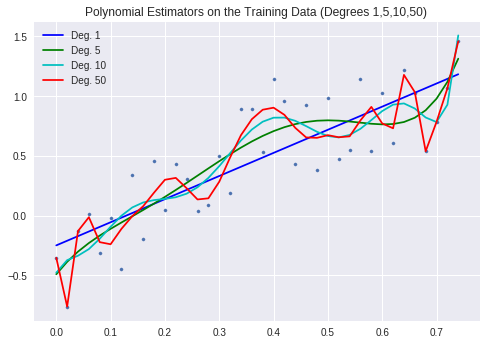

In [0]:
plotPolynomials(x_training, y_training)

**Plotting the MSE obtained on the training data and the test data as
a function of the degree of the polynomial **

Since the MSE for degree 50 is quite large, I have first taken the MSE for degrees 1, 2, 3 and 4 to show the dip and rise in test MSE. This is expected since there should exist a certain degree of complexity at which the flexibility of the polynomial gives lowest test MSE and then rises. This is not shown if we only take degrees 1, 5, 10 and 50.

Test MSE for degree 1: 0.6934037670571992
Train MSE for degree 1: 0.08752567654091321
Test MSE for degree 2: 0.17013098800578114
Train MSE for degree 2: 0.07828569945014979
Test MSE for degree 3: 0.6857661490339013
Train MSE for degree 3: 0.07693795397933804
Test MSE for degree 4: 9.002604443929222
Train MSE for degree 4: 0.07309047552262268


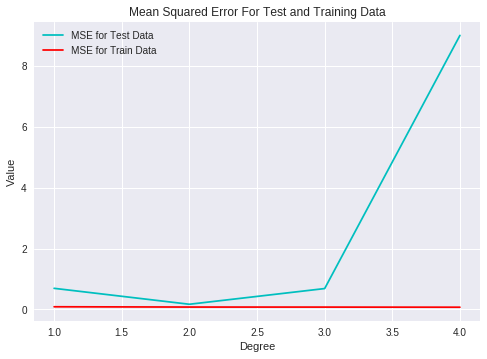

[0.6934037670571992, 0.17013098800578114, 0.6857661490339013, 9.002604443929222]


In [0]:
degrees = [1, 2, 3, 4]
plotMSE(x_training, y_training, x_test, y_test, degrees)

Here I have plotted MSE test and train for degrees 1, 5, 10 and 50

Test MSE for degree 1: 0.6934037670571992
Train MSE for degree 1: 0.08752567654091321
Test MSE for degree 5: 56.32039341744825
Train MSE for degree 5: 0.0709564789263713
Test MSE for degree 10: 49107.80625274555
Train MSE for degree 10: 0.061896443265638056
Test MSE for degree 50: 2.021560962483771e+24
Train MSE for degree 50: 0.04287032415039168


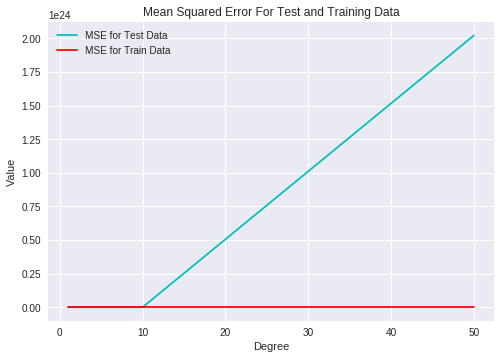

[0.6934037670571992, 56.32039341744825, 49107.80625274555, 2.021560962483771e+24]


In [0]:
deg = [1, 5, 10, 50]
plotMSE(x_training, y_training, x_test, y_test, deg)

**Based on the above experiments, what can be said about the
degree of the polynomial and the MSE**

a. The MSE for Training data decreses with an increase in degree. This is expected since a higher egree polynomial will overfit the training data and ensure that MSE is lower. On the other hand, the lower th edegree of the polynomial, the less flexibility (degrees of freedom) it has to make accurate predictions on the training data.

b. On first glance, the MSE of testing data seems to increase extensively for degree 50 in comparison to 1, 5 and 10. This is expected since a polynomial with such a high degree has overfitted for the training data and is unlikely to make accurate predictions for new data (test data)

c. If we look closer, specifically to degrees 1, 2, 3 and 4, we see that the MSE for test actually decreases and is lowest at 2 and on an average increases from then onwards. This is also expected since there is an ideal degree of freedom or flexibility of the model that allows for more accurate predictions on data that is not from the training set. In this case, a polynomial of degree 2 is that level of complexity which offers the correct amount of flexibility to the polynomial such that it is a good estimator of the function. 

**Plotting the MSE, the squared Bias, and the Variance as a function
of the degree of the polynomial**

a. The test MSE is increasing with the degree of the polynomial. This is expected since the polynomial with higher degree is likely to overfit itself for the training data and hence, will make non-accurate predicitions for the test data (or new data).

b. The MSE is larger than the Squared Bias and Variance which is also expected since MSE can be decomposed to two positive values - Squared Bias and Variance.

c. The Bias increases with the degree. This is not surprising since a higher egree polynomial overfits on the training data. Hence, the Squared bias for 50 is relatively large in comparison to the others.

d. The Variance also has an increasing trend overall. This s because a lower degree polynomial is supposed have less variance due to it's lack of flexibility. On the other hand, a higher degree polynomial overfits on the training data so much that its predictions are bound to vary from the average of its predictions even when we take a 100 samples from the distribution.

e. Ideally if the mean and variance of the irreducible error is 0, the MSE should equal the Squared Bias and Variance. In this case, there is a large difference between the MSE and the other two. Therefore, it can be concluded that there exists a large irreducible error that has caused teh deviation.





---------------------------------------------------------------------
Degree: [1, 5, 10, 50]
---------------------------------------------------------------------
Test MSE: [0.6934037670571992, 56.32039341744825, 49107.80625274555, 2.021560962483771e+24]
---------------------------------------------------------------------
Squared Bias: [0.26366681092436306, 0.26897380453680453, 0.2853655201358283, 16465770599.460724]
---------------------------------------------------------------------
Variance: [5.5911281393419995e-33, 8.956784585850468e-33, 7.669730444910931e-33, 5.456106745667144e-22]


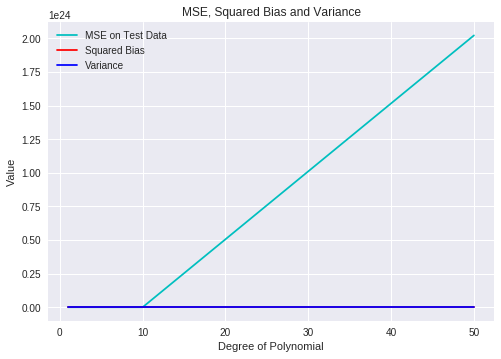

In [0]:
MSE_var_bias(x_training, y_training, x_test, y_test, deg, y, x)

**Creating a new estimator whose output is the average of the 4 estimators you created above (i.e. polynomials of degree 1, 5, 10, and 50). Plotting the function that is obtainned by overlaying on the data.**

**What is the difference between this (composite) estimator and the
individual estimators?**

a. The average of the 4 polynomials based on output is shown below. Since we took the average and NOT weighted average, the effect of the outputs from the 50 degree polynomial has been given a lot of importance. Therefore, the avergae polynomial is more influenced by the 50 degree polynomial than the others purely based on the fact that it is an outlier when compared to 1, 5 and 10. 

b. This average estimator might seem to make better preictions for the training data when compared to polynomials with degree 1, 5 and 10, but it will have a higher MSE compared to them when run on test data. This is also because it is highly influenced by the 50 degree polyomial and thus will have overfit the training data (relative to 1, 5, 10).

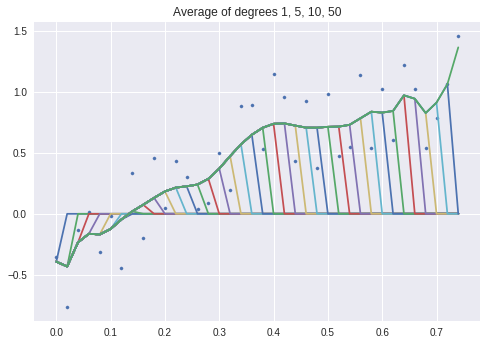

In [0]:
avg_poly(x_training, y_training)

**Creating a 100 estimators and
take the 3 best estimators from them (possibly in terms of MSE
on the training data). Using the average of the 3 best estimators to
create a new estimator.**

a. I created a 100 estimators with increasing odd degrees (3, 5, 7...). The best estimators were chosen based on the lowest MSE on training data. 

b. There is no other perceivable criteria to chose except lowest MSE since the it is hard to judge how accurate each estimator would be on a new dataset without validating it using a test dataset. 

c. The issue with this methodology is that the lowest training MSE would be for the highest degree polynomials. This is because it has the flexibility to overfit the training dataser and make accurate prediction ONLY for the training dataset. Hence, resulting in low training MSE. But as we have seen above, the higher the degree, the higher the test MSE if were to check the best 3 estimators on test data. 

d. Below is the training MSE for the 100 estimators. For this dataset, the MSE stagnates and reaches a minimum from degrees 153 to 199. Therefore, it is definitely expected that they will overfit the data the same. There will not be much of a difference in their curves when plotted on the training data. This is also shown in the graph below. The best three estimators almost seem like they are superimposed on one another. This is not surprising since there must be very similar and overfit the data. 

e. Since these 3 "best" estimators are so similar, the average (based on output) should also be very similar. This is also shown in the last graph. Therefore, reinstating that **multiple strong estimators cannot make another stronger estimator**, mainly due to the high correlation. 

f. The above observations are based on the given dataset, but it can be extrapolated to larger datasets as well. There is an inherent flaw with making estimators based o training data, especially if it is not truly representative of the distribution. Additionally, taking best estimators to make a better estimator is unlikely since they are bound to be similar due to their complexity.

1 :  0.08752567654091321
3 :  0.07693795397933804
5 :  0.0709564789263713
7 :  0.07069012235574453
9 :  0.062111511941956035
11 :  0.057214173714455856
13 :  0.04968183173395544
15 :  0.04815474590966532
17 :  0.047824875564649975
19 :  0.045134553848933
21 :  0.044727053770286664
23 :  0.04432949972954766
25 :  0.04423868719038374
27 :  0.04397809983927451
29 :  0.044040296108612965
31 :  0.04409811771428859
33 :  0.04345121549852951
35 :  0.04328058437958235
37 :  0.043143687148150055
39 :  0.043038618009556655
41 :  0.04296156247797133
43 :  0.04280294104780242
45 :  0.04267338239806969
47 :  0.04287057485368523
49 :  0.042860599905123274
51 :  0.04287299539092501
53 :  0.04287980130439859
55 :  0.042876864985656855
57 :  0.04286522219995262
59 :  0.04288138626643203
61 :  0.04287578651647277
63 :  0.04287780792434481
65 :  0.042880539998959286
67 :  0.04287924038552069
69 :  0.04288033586345894
71 :  0.04287371515923266
73 :  0.04287793572206084
75 :  0.04288142861681804
77 :  0.04

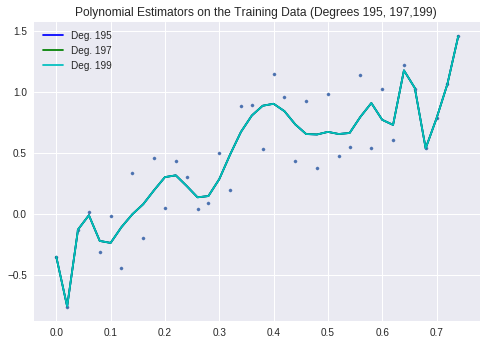

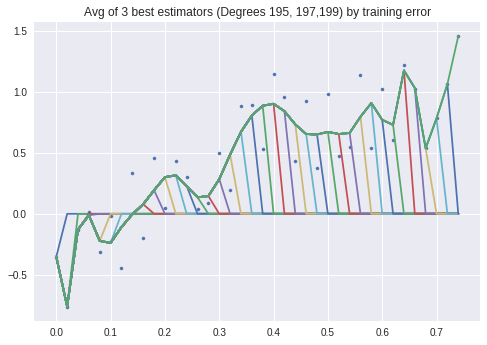

In [0]:
best_estimator(x_training, y_training)